In [135]:
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [136]:
# read the data in the dataframe
df = pd.read_excel('./data/census-data.xlsx', 'Sheet1', header=1, index_col=1, na_values=['-']).drop(labels='Label',axis=1)
df.shape

(806, 48)

In [137]:
df.head()

,Total housing units,Occupied housing units,Average household size,Owner-occupied housing units (percent),Renter-occupied housing units (percent),"Percent Units value less than $50,000 (percent)","Percent Units value between $50,000 to $99,999","Percent Units value between $100,000 to $149,999","Percent Units value between $150,000 to $199,999","Percent Units value between $200,000 to $299,999",...,"Monthly housing cost $1,000 to $1,499","Monthly housing cost $1,500 to $1,999","Monthly housing cost $2,000 to $2,499","Monthly housing cost $2,500 to $2,999","Monthly housing cost $3,000 or more",Monthly housing cost Median (dollars),Population 18 to 24 years,Population 25 years and over,Adults (25 or over) High school graduate or higher,Adults (25 or over) Bachelor's degree or higher
Zip Code,,,,,,,,,,,,,,,,,,,,,
27006,6900,6255,2.43,91.4,8.6,5.0,6.4,12.0,21.2,23.3,...,1502,603,444,184,474,1029.0,818,11375,96.1,38.7
27007,1014,851,2.93,88.8,11.2,7.5,18.9,23.8,27.1,14.7,...,169,44,44,8,0,783.0,231,1836,80.0,16.3
27009,1288,1162,2.88,93.5,6.5,16.1,11.0,16.9,20.9,15.5,...,304,96,34,9,59,940.0,149,2271,90.4,20.3
27011,2569,2279,2.14,72.0,28.0,12.1,22.9,34.1,16.1,10.0,...,245,131,37,24,9,673.0,438,3608,85.6,14.7
27012,11761,10915,2.55,81.3,18.7,1.9,3.5,10.1,20.2,32.0,...,2100,2150,758,390,369,1101.0,2181,19912,94.4,47.0


# People favoring donations
* High quality house
* More homeownership
* Less expensive
* Educated adult

In [138]:
columns = [
  'Owner-occupied housing units (percent)',
  'Dollars median units value',
  'Dollars median rent',
  'Median income (dollars)',
  'Monthly housing cost Median (dollars)',
  'Adults (25 or over) Bachelor\'s degree or higher'
]
df1 = df[columns].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 27006 to 28909
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Owner-occupied housing units (percent)           797 non-null    float64
 1   Dollars median units value                       763 non-null    float64
 2   Dollars median rent                              710 non-null    float64
 3   Median income (dollars)                          766 non-null    float64
 4   Monthly housing cost Median (dollars)            771 non-null    float64
 5   Adults (25 or over) Bachelor's degree or higher  800 non-null    float64
dtypes: float64(6)
memory usage: 44.1 KB


In [139]:
# Check for the null values in each column
for col in columns:    
    blank_value_count = df1[col].isna().sum()
    print(f'The count of blank value for {col} are : {blank_value_count}')

The count of blank value for Owner-occupied housing units (percent) are : 9
The count of blank value for Dollars median units value are : 43
The count of blank value for Dollars median rent are : 96
The count of blank value for Median income (dollars) are : 40
The count of blank value for Monthly housing cost Median (dollars) are : 35
The count of blank value for Adults (25 or over) Bachelor's degree or higher are : 6


In [140]:
# Remove the null values from the data
df1.dropna(axis = 0, inplace=True)
# Check the data left after removing null
df1.shape

(692, 6)

**Elbow method to identify the optimal number of clusters**

In [141]:
sse = []
for n in range(1, 100):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(df1)
  sse.append(kmeans.inertia_)

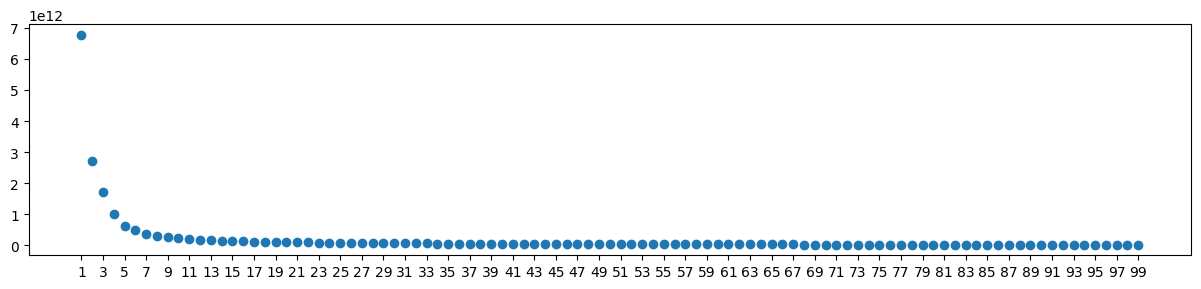

In [142]:
plt.figure(figsize=(15, 3))
plt.scatter(range(1, 100), sse)
plt.xticks(range(1, 100, 2))
plt.show()

In [143]:
# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=8, random_state=0).fit(df1)

In [144]:
# Get the centers of the clusters
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns).round(2)
centers

,Owner-occupied housing units (percent),Dollars median units value,Dollars median rent,Median income (dollars),Monthly housing cost Median (dollars),Adults (25 or over) Bachelor's degree or higher
0,70.35,120095.12,712.26,45937.10,677.74,16.25
1,71.33,262364.29,1020.34,65485.56,1047.06,39.54
2,77.25,959850.00,1458.00,141435.00,1993.00,77.10
3,70.88,158681.77,803.63,52282.22,804.10,21.09
4,65.07,462338.89,1255.83,93781.94,1438.94,64.14
5,74.58,206414.63,956.73,62656.33,939.39,32.36
6,68.00,81055.81,694.21,39013.66,615.95,12.80
7,71.00,344408.70,1204.57,85828.46,1304.22,53.46


In [145]:
# Assigning identified clusters to the dataset
df1['Cluster'] = kmeans.labels_

In [146]:
# Sort the cluster centers in descending order
columns_list = list(centers.columns)
columns_list.remove('Owner-occupied housing units (percent)')
centers = centers.sort_values(by = columns_list, ascending=False)
centers

,Owner-occupied housing units (percent),Dollars median units value,Dollars median rent,Median income (dollars),Monthly housing cost Median (dollars),Adults (25 or over) Bachelor's degree or higher
2,77.25,959850.00,1458.00,141435.00,1993.00,77.10
4,65.07,462338.89,1255.83,93781.94,1438.94,64.14
7,71.00,344408.70,1204.57,85828.46,1304.22,53.46
1,71.33,262364.29,1020.34,65485.56,1047.06,39.54
5,74.58,206414.63,956.73,62656.33,939.39,32.36
3,70.88,158681.77,803.63,52282.22,804.10,21.09
0,70.35,120095.12,712.26,45937.10,677.74,16.25
6,68.00,81055.81,694.21,39013.66,615.95,12.80


**Printing top 3 clusters**

In [147]:
df1[df1['Cluster'] == 2]

,Owner-occupied housing units (percent),Dollars median units value,Dollars median rent,Median income (dollars),Monthly housing cost Median (dollars),Adults (25 or over) Bachelor's degree or higher,Cluster
Zip Code,,,,,,,
28207,80.4,1060300.0,1232.0,177898.0,2137.0,85.6,2
28480,74.1,859400.0,1684.0,104972.0,1849.0,68.6,2


In [148]:
df1[df1['Cluster'] == 4]

,Owner-occupied housing units (percent),Dollars median units value,Dollars median rent,Median income (dollars),Monthly housing cost Median (dollars),Adults (25 or over) Bachelor's degree or higher,Cluster
Zip Code,,,,,,,
27514,51.7,485500.0,1189.0,82813.0,1311.0,77.4,4
27517,66.7,414200.0,1315.0,93636.0,1419.0,74.8,4
27518,67.6,431500.0,1330.0,108937.0,1464.0,74.2,4
27519,73.1,439800.0,1530.0,136019.0,1782.0,76.9,4
27607,52.1,438900.0,1182.0,79134.0,1306.0,72.1,4
27608,75.2,677000.0,1193.0,119211.0,1622.0,80.2,4
27927,83.4,453100.0,867.0,65000.0,1248.0,45.9,4
27949,86.9,437500.0,1355.0,87571.0,1618.0,51.8,4
28117,71.0,454800.0,1249.0,92518.0,1465.0,52.4,4


In [149]:
df1[df1['Cluster'] == 7]

,Owner-occupied housing units (percent),Dollars median units value,Dollars median rent,Median income (dollars),Monthly housing cost Median (dollars),Adults (25 or over) Bachelor's degree or higher,Cluster
Zip Code,,,,,,,
27312,80.9,328100.0,862.0,75677.0,1113.0,52.5,7
27358,86.3,310700.0,989.0,99450.0,1279.0,45.0,7
27502,81.2,348400.0,1409.0,115718.0,1648.0,62.4,7
27510,30.2,339700.0,1145.0,56339.0,1182.0,66.1,7
27513,60.6,349800.0,1221.0,99585.0,1336.0,67.0,7
27516,69.9,386500.0,1213.0,86926.0,1428.0,70.8,7
27523,74.5,346100.0,1399.0,90862.0,1307.0,70.4,7
27539,80.8,341000.0,1375.0,110579.0,1526.0,53.6,7
27540,83.1,348000.0,1466.0,110692.0,1672.0,57.3,7


In [150]:
df1.to_excel('clusters.xlsx')